# Faktor Apakah yang Menjual Sebuah Mobil?

Anda adalah seorang analis di Crankshaft List. Ratusan iklan kendaraan gratis ditayangkan di situs web Anda setiap hari. Anda perlu mempelajari kumpulan data selama beberapa tahun terakhir dan menentukan faktor-faktor yang memengaruhi harga sebuah kendaraan.

Sebelum melakukan analisis perlu untuk melihat datanya jika ada datanya yang hilang, duplikat, ataupun salah tipe nya dan perlu untuk diperbaiki. Jika tidak diperbaiki bisa mempengaruhi hasil dari analisis.

## Pra-pemrosesan

In [1]:
# Memuat semua library
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

### Memuat Data

In [2]:
# Memuat file data menjadi DataFrame
try:
    df = pd.read_csv('/datasets/vehicles_us.csv')
except:
    df = pd.read_csv('/Users/mohar/Downloads/vehicles_us.csv')
df

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,NaN,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,NaN,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,NaN,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,NaN,2018-07-02,71


### Mengeksplorasi Data Awal

*Dataset* berisi kolom-kolom berikut: 


- `price` - harga kendaraan
- `model_year` - tahun pembuatan
- `model` - tipe kendaraan
- `condition` - kondisi dari kendaraan
- `cylinders` - jumlah silinder mesin
- `fuel` - gas, disel, dan lain-lain.
- `odometer` - jarak tempuh kendaraan saat iklan ditayangkan  
- `transmission` - jenis transmisi
- `paint_color` - warna kendaraan
- `is_4wd` - apakah kendaraan memiliki penggerak 4 roda
- `date_posted` - tanggal iklan ditayangkan 
- `days_listed` - jumlah hari iklan ditayangkan hingga dihapus 

In [3]:
# Menampilkan informasi/rangkuman umum tentang DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [4]:
# Menampilkan sampel data
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


In [5]:
df.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


Ada beberapa kolom yang nilainya hilang dan kolom dengan tipe data yang tidak sesuai.

- Kolom date_posted harusnya datetype
- Kolom model_year harusnya integer karena tidak mungkin tahun nilainya pecahan
- Untuk is_4wd seharunya boolean

Ada 5 kolom yang nilainya hilang dan perlu didalami untuk cara mengisinya. Untuk kolom yang paling banyak adalah kolom 'is_4wd'.

### Kesimpulan dan Langkah-Langkah Selanjutnya

- Menganalisa kolom 'model_year' adakah hubungannya dengan kolom 'model', dan menentukan nilai yang digunakan untuk mengisi nilai yang hilang, serta mengubah tipe datanya menjadi integer
- Menganalisa kolom 'model' dan 'cylinders' untuk menentukan nilai yang hilang
- Mengisi nilai yang hilang di kolom 'pain_color' dengan 'unknown'
- Mengisi nilai yang hilang di kolom 'is_4wd' dengan nilai false
- Menghapus baris yang nilai di kolom 'odometer' hilang

## Mengatasi Nilai-Nilai yang Hilang (Jika Ada)

In [6]:
df.isna().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

In [7]:
# Membuat fungsi yang berguna untuk mengisi nilai yang kosong dengan berdasarkan group rata-rata kolom lain
def fill_missing_value(dataframe, agg_column, value_column):
    grouped_values = dataframe.groupby(agg_column)[value_column].mean().reset_index()
    size = len(grouped_values)
    for i in range(size):
        group = grouped_values[agg_column][i]
        value = grouped_values[value_column][i]
        dataframe.loc[(dataframe[agg_column]==group) & (dataframe[value_column].isna()), value_column] = value
    return dataframe

In [8]:
# Mengelompokkan nilai dari kolom 'model' dan 'model_year' untuk mendapatakan rata-rata dari 'model_year' berdasarkan 'model'nya
# dan mengisikan nilai tersebut ke nilai-nilai yang kosong pada kolom 'model_year'
df1 = fill_missing_value(df, 'model', 'model_year')
df1.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.000000,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,2009.354702,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.000000,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.000000,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.000000,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


In [9]:
# Menerapkan hal yang sama untuk mengisi nilai yang hilang di kolom 'cylinders'
df2 = fill_missing_value(df, 'model', 'cylinders')
df2.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.000000,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,2009.354702,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.000000,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.000000,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.000000,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


In [10]:
# Mengisi nilai yang hilang di kolom 'pain_color' menjadi unknown karena susah untuk memastikan warna dari kendaraan tersebut
df2['paint_color'] = df2['paint_color'].fillna('unknown')
df2.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.000000,bmw x5,good,6.0,gas,145000.0,automatic,SUV,unknown,1.0,2018-06-23,19
1,25500,2009.354702,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.000000,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.000000,ford f-150,fair,8.0,gas,NaN,automatic,pickup,unknown,NaN,2019-03-22,9
4,14900,2017.000000,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


In [11]:
# Memperbaiki nilai di kolom 'is_4wd' yang hilang dengan 0 
df2.loc[df2['is_4wd'].isna(), 'is_4wd'] = 0
df2['is_4wd'] = df2['is_4wd'].astype(bool)
df2.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.000000,bmw x5,good,6.0,gas,145000.0,automatic,SUV,unknown,True,2018-06-23,19
1,25500,2009.354702,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,True,2018-10-19,50
2,5500,2013.000000,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,False,2019-02-07,79
3,1500,2003.000000,ford f-150,fair,8.0,gas,NaN,automatic,pickup,unknown,False,2019-03-22,9
4,14900,2017.000000,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,False,2019-04-02,28


In [12]:
# Menghapus baris yang kolom 'odometer'nya hilang
df2 = df2.dropna().reset_index(drop=True)
df2

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.000000,bmw x5,good,6.0,gas,145000.0,automatic,SUV,unknown,True,2018-06-23,19
1,25500,2009.354702,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,True,2018-10-19,50
2,5500,2013.000000,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,False,2019-02-07,79
3,14900,2017.000000,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,False,2019-04-02,28
4,14990,2014.000000,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,True,2018-06-20,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43628,3750,2005.000000,ford taurus,excellent,6.0,gas,110200.0,automatic,sedan,silver,False,2018-08-10,63
43629,9249,2013.000000,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,False,2018-10-03,37
43630,2700,2002.000000,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,False,2018-11-14,22
43631,3950,2009.000000,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,False,2018-11-15,32


In [13]:
df2.isna().sum()

price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
type            0
paint_color     0
is_4wd          0
date_posted     0
days_listed     0
dtype: int64

Semua data yang hilang telah terisi untuk baris yang kolom 'odometer'nya hilang saya hapus saja karena kita tidak dapat tau pasti berapa nilai nya, dan dapat mempengaruhi analisis selanjutnya.

## Memperbaiki Tipe Data

In [14]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43633 entries, 0 to 43632
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         43633 non-null  int64  
 1   model_year    43633 non-null  float64
 2   model         43633 non-null  object 
 3   condition     43633 non-null  object 
 4   cylinders     43633 non-null  float64
 5   fuel          43633 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  43633 non-null  object 
 8   type          43633 non-null  object 
 9   paint_color   43633 non-null  object 
 10  is_4wd        43633 non-null  bool   
 11  date_posted   43633 non-null  object 
 12  days_listed   43633 non-null  int64  
dtypes: bool(1), float64(3), int64(2), object(7)
memory usage: 4.0+ MB


In [15]:
df2.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.000000,bmw x5,good,6.0,gas,145000.0,automatic,SUV,unknown,True,2018-06-23,19
1,25500,2009.354702,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,True,2018-10-19,50
2,5500,2013.000000,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,False,2019-02-07,79
3,14900,2017.000000,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,False,2019-04-02,28
4,14990,2014.000000,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,True,2018-06-20,15


In [16]:
# Mengubah tipe data kolom 'model_year' dan 'cylinders' menjadi integer dan kolom 'date_posted' menjadi datetime
df2['model_year'] = df2['model_year'].astype('int64')
df2['cylinders'] = df2['cylinders'].astype('int64')

In [17]:
df_clean = df2
df_clean['date_posted'] = pd.to_datetime(df2['date_posted'], format='%Y-%m-%d')

In [18]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43633 entries, 0 to 43632
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         43633 non-null  int64         
 1   model_year    43633 non-null  int64         
 2   model         43633 non-null  object        
 3   condition     43633 non-null  object        
 4   cylinders     43633 non-null  int64         
 5   fuel          43633 non-null  object        
 6   odometer      43633 non-null  float64       
 7   transmission  43633 non-null  object        
 8   type          43633 non-null  object        
 9   paint_color   43633 non-null  object        
 10  is_4wd        43633 non-null  bool          
 11  date_posted   43633 non-null  datetime64[ns]
 12  days_listed   43633 non-null  int64         
dtypes: bool(1), datetime64[ns](1), float64(1), int64(4), object(6)
memory usage: 4.0+ MB


## Memperbaiki Kualitas Data

In [19]:
# Menambahkan nilai waktu dan tanggal pada saat iklan ditayangkan 
df_clean['weekday_posted'] = df_clean['date_posted'].dt.weekday
df_clean['month_posted'] = df_clean['date_posted'].dt.month
df_clean['day_posted'] = df_clean['date_posted'].dt.day
df_clean['year_posted'] = df_clean['date_posted'].dt.year
df_clean.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,month_posted,day_posted,year_posted
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,unknown,True,2018-06-23,19,5,6,23,2018
1,25500,2009,ford f-150,good,6,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,4,10,19,2018
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,3,2,7,2019
3,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,1,4,2,2019
4,14990,2014,chrysler 300,excellent,6,gas,57954.0,automatic,sedan,black,True,2018-06-20,15,2,6,20,2018


In [20]:
# Menambahkan usia kendaraan saat iklan ditayangkan
df_clean['age'] = df_clean['year_posted'] - df_clean['model_year']
df_clean['age'] = df_clean['age'].replace(0,1)
df_clean.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,month_posted,day_posted,year_posted,age
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,unknown,True,2018-06-23,19,5,6,23,2018,7
1,25500,2009,ford f-150,good,6,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,4,10,19,2018,9
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,3,2,7,2019,6
3,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,1,4,2,2019,2
4,14990,2014,chrysler 300,excellent,6,gas,57954.0,automatic,sedan,black,True,2018-06-20,15,2,6,20,2018,4


In [21]:
# Menambahkan jarak tempuh rata-rata kendaraan per tahun 
df_clean['range_per_year'] = df_clean['odometer'] / df_clean['age']
df_clean

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,month_posted,day_posted,year_posted,age,range_per_year
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,unknown,True,2018-06-23,19,5,6,23,2018,7,20714.285714
1,25500,2009,ford f-150,good,6,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,4,10,19,2018,9,9856.111111
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,3,2,7,2019,6,18333.333333
3,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,1,4,2,2019,2,40451.500000
4,14990,2014,chrysler 300,excellent,6,gas,57954.0,automatic,sedan,black,True,2018-06-20,15,2,6,20,2018,4,14488.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43628,3750,2005,ford taurus,excellent,6,gas,110200.0,automatic,sedan,silver,False,2018-08-10,63,4,8,10,2018,13,8476.923077
43629,9249,2013,nissan maxima,like new,6,gas,88136.0,automatic,sedan,black,False,2018-10-03,37,2,10,3,2018,5,17627.200000
43630,2700,2002,honda civic,salvage,4,gas,181500.0,automatic,sedan,white,False,2018-11-14,22,2,11,14,2018,16,11343.750000
43631,3950,2009,hyundai sonata,excellent,4,gas,128000.0,automatic,sedan,blue,False,2018-11-15,32,3,11,15,2018,9,14222.222222


In [22]:
# Mengganti nilai pada kolom 'condition' dengan sesuatu yang dapat dimanipulasi dengan lebih mudah 
df_clean['condition'] = df_clean['condition'].map({
    'new' : 5,
    'like new' : 4,
    'excellent' : 3,
    'good' : 2,
    'fair' : 1,
    'salvage' : 0
})

df_clean.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,month_posted,day_posted,year_posted,age,range_per_year
0,9400,2011,bmw x5,2,6,gas,145000.0,automatic,SUV,unknown,True,2018-06-23,19,5,6,23,2018,7,20714.285714
1,25500,2009,ford f-150,2,6,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,4,10,19,2018,9,9856.111111
2,5500,2013,hyundai sonata,4,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,3,2,7,2019,6,18333.333333
3,14900,2017,chrysler 200,3,4,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,1,4,2,2019,2,40451.500000
4,14990,2014,chrysler 300,3,6,gas,57954.0,automatic,sedan,black,True,2018-06-20,15,2,6,20,2018,4,14488.500000


## Memeriksa Data yang Sudah Bersih

In [23]:
# Menampilkan informasi/rangkuman umum tentang DataFrame
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43633 entries, 0 to 43632
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   price           43633 non-null  int64         
 1   model_year      43633 non-null  int64         
 2   model           43633 non-null  object        
 3   condition       43633 non-null  int64         
 4   cylinders       43633 non-null  int64         
 5   fuel            43633 non-null  object        
 6   odometer        43633 non-null  float64       
 7   transmission    43633 non-null  object        
 8   type            43633 non-null  object        
 9   paint_color     43633 non-null  object        
 10  is_4wd          43633 non-null  bool          
 11  date_posted     43633 non-null  datetime64[ns]
 12  days_listed     43633 non-null  int64         
 13  weekday_posted  43633 non-null  int64         
 14  month_posted    43633 non-null  int64         
 15  da

In [24]:
# Menampilkan sampel data 
df_clean.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,month_posted,day_posted,year_posted,age,range_per_year
0,9400,2011,bmw x5,2,6,gas,145000.0,automatic,SUV,unknown,True,2018-06-23,19,5,6,23,2018,7,20714.285714
1,25500,2009,ford f-150,2,6,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,4,10,19,2018,9,9856.111111
2,5500,2013,hyundai sonata,4,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,3,2,7,2019,6,18333.333333
3,14900,2017,chrysler 200,3,4,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,1,4,2,2019,2,40451.500000
4,14990,2014,chrysler 300,3,6,gas,57954.0,automatic,sedan,black,True,2018-06-20,15,2,6,20,2018,4,14488.500000


## Mempelajari Parameter Inti 

Parameternya adalah 
- Harga
- Usia kendaraan ketika iklan ditayangkan
- Jarak tempuh
- Jumlah silinder 
- Kondisi

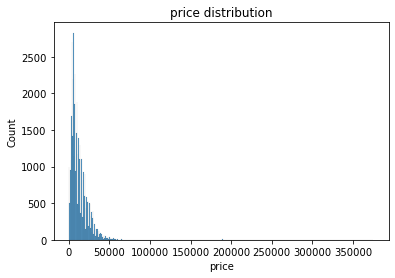

In [25]:
# Harga
plt.title('price distribution')
sns.histplot(df_clean['price'])
plt.show()

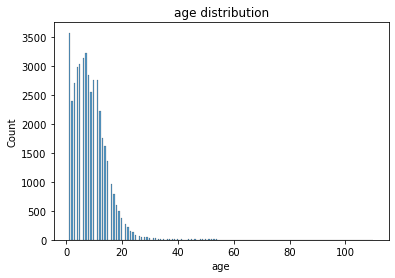

In [26]:
# Usia kendaraan ketika iklan ditayangkan
plt.title('age distribution')
sns.histplot(df_clean['age'])
plt.show()

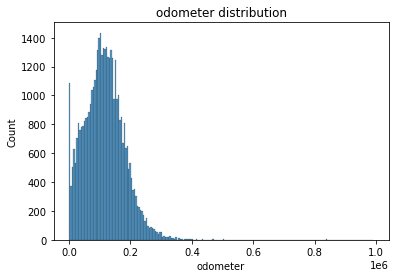

In [27]:
# Jarak tempuh
plt.title('odometer distribution')
sns.histplot(df_clean['odometer'])
plt.show()

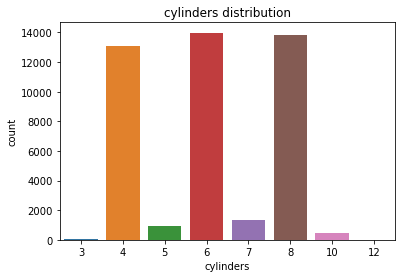

In [28]:
# Jumlah silinder
plt.title('cylinders distribution')
sns.countplot(df_clean['cylinders'])
plt.show()

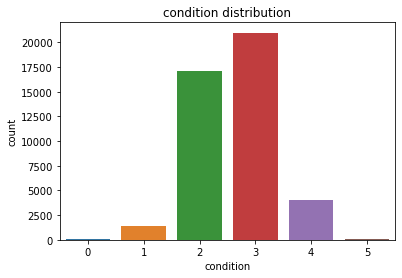

In [29]:
# Kondisi
plt.title('condition distribution')
sns.countplot(df_clean['condition'])
plt.show()

## Mempelajari dan Menangani Outlier

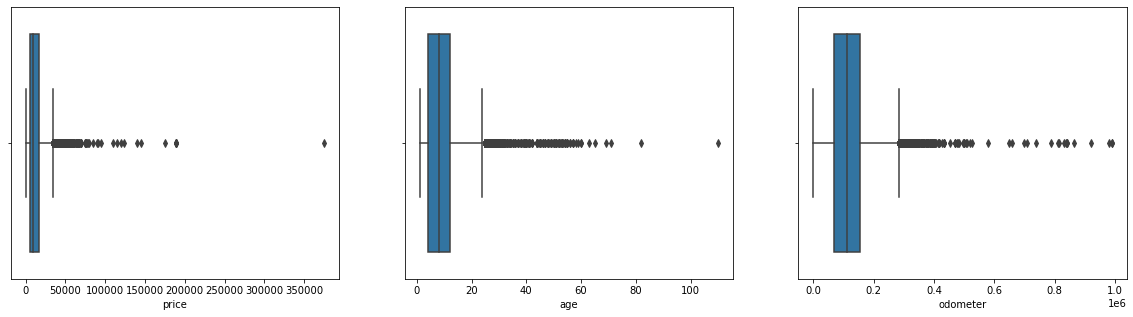

In [30]:
plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(df_clean['price'])

plt.subplot(1, 3, 2)
sns.boxplot(df_clean['age'])

plt.subplot(1, 3, 3)
sns.boxplot(df_clean['odometer'])

plt.show()

Menurut saya hanya ada 3 kolom yang mengandung outliers yaitu kolom 'price', 'age', dan 'odometer' dan akan saya hilangkan 

In [31]:
# Menentukan batas bawah outlier 
def upper_lower_whisker(column_name=''):
    Q1  = df_clean[column_name].quantile(0.25)
    Q3  = df_clean[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1 - 1.5*IQR
    upper_whisker = Q3 + 1.5*IQR
    return lower_whisker, upper_whisker

list_of_selected_column = ['price','age','odometer']

for column in list_of_selected_column:
    lower, upper = upper_lower_whisker(column)
    print('Batas bawah outlier dari',column, lower)

Batas bawah outlier dari price -12700.0
Batas bawah outlier dari age -8.0
Batas bawah outlier dari odometer -57500.0


In [32]:
# Menentukan batas atas outlier 
for column in list_of_selected_column:
    lower, upper = upper_lower_whisker(column)
    print('Batas atas outlier dari',column, upper)

Batas atas outlier dari price 34500.0
Batas atas outlier dari age 24.0
Batas atas outlier dari odometer 282500.0


In [33]:
# Menyimpan data tanpa outlier dalam DataFrame yang terpisah
df_final = df_clean

for column in list_of_selected_column:
    lower, upper = upper_lower_whisker(column)
    df_final = df_final[(df_final[column] > lower) & (df_final[column] < upper)]

## Mempelajari Parameter Inti Tanpa Outlier

=> Data dengan outlier

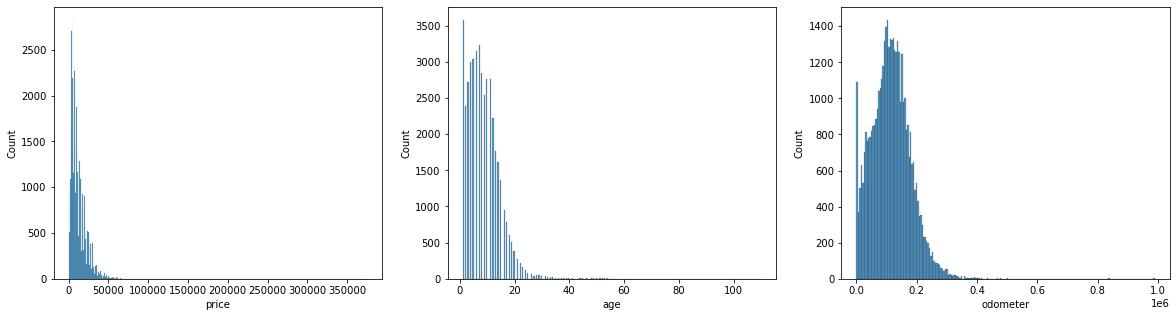

In [34]:
plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 1)
sns.histplot(df_clean['price'])

plt.subplot(1, 3, 2)
sns.histplot(df_clean['age'])

plt.subplot(1, 3, 3)
sns.histplot(df_clean['odometer'])

plt.show()

=> Data tanpa outlier

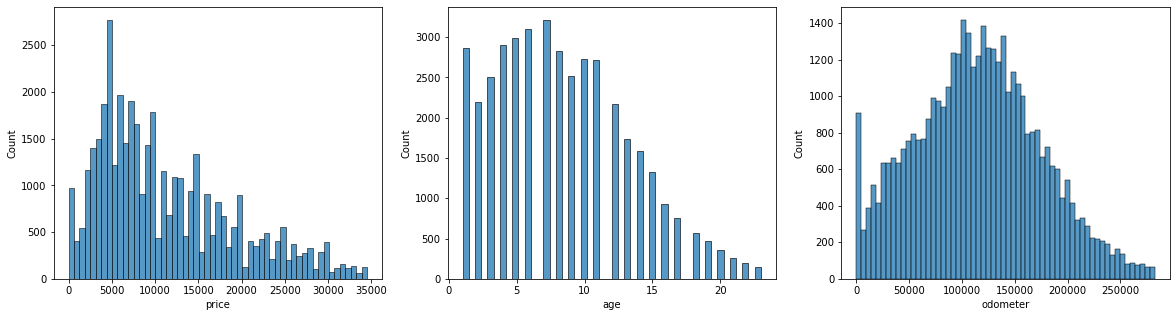

In [35]:
plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 1)
sns.histplot(df_final['price'])

plt.subplot(1, 3, 2)
sns.histplot(df_final['age'])

plt.subplot(1, 3, 3)
sns.histplot(df_final['odometer'])

plt.show()

Terlihat perbedaannya, memang untuk outlier masih ada namun tidak se ekstrim data yang sebelum dihilangkan atau diminimalkan outliernya.

## Masa Berlaku Iklan 

In [36]:
df_final['days_listed'].describe()

count    41024.000000
mean        39.597065
std         28.122382
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

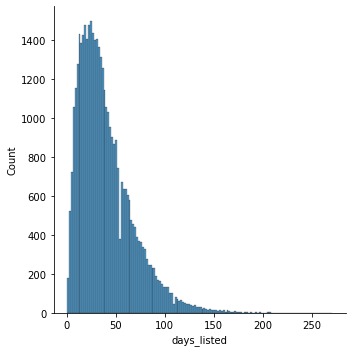

In [37]:
sns.displot(data=df_final['days_listed'])
plt.show()

- Menurut data diatas rata-rata iklan ditayangkan selama 40 hari setelah itu kendaraan tersebut sudah laku terjual
- Paling lama iklan ditayangkan selama 271 hari atau sekitar 9 bulan sebelum akhirnya kendaraan tersebut laku terjual
- Paling cepat berdasarkan data bisa 0 hari yang artinya iklan baru saja tayang langsung laku terjual di hari yang sama

## Harga Rata-Rata Setiap Jenis Kendaraan

In [38]:
df_type = df_final.pivot_table(
    index='type', 
    values=['price', 'model'], 
    aggfunc={'price':'mean',
             'model':'count'}).rename(
    columns={'price':'avg_price',
             'model':'count_type'}).sort_values('count_type', ascending=False)
df_type

,count_type,avg_price
type,,
sedan,10154,6953.778806
SUV,10078,10437.239333
truck,9471,15073.628022
pickup,5318,15030.232606
coupe,1711,13486.052601
wagon,1276,8871.964734
mini-van,985,8124.223350
hatchback,873,6764.534937
van,487,9031.525667


In [39]:
df_type.sort_values('avg_price')

,count_type,avg_price
type,,
hatchback,873,6764.534937
sedan,10154,6953.778806
mini-van,985,8124.223350
wagon,1276,8871.964734
van,487,9031.525667
SUV,10078,10437.239333
other,205,10537.795122
convertible,288,12863.527778
coupe,1711,13486.052601


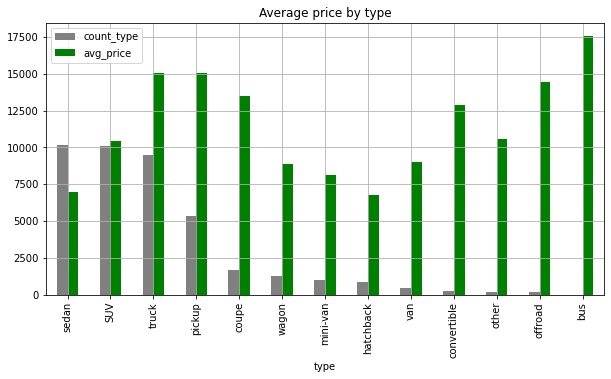

In [40]:
df_type.plot(kind='bar', y=['count_type','avg_price'], color=['grey','green'], figsize=(10,5), grid=True)
plt.title('Average price by type')
plt.show()

Dari data tersebut harga rata-rata yang paling mahal adalah kendaraan tipe bus, dengan jumlah iklannya paling sedikit. Sedangkan tipe Sedan memiliki jumlah iklan yang paling banyak dengan harga rata-rata nomor 2 paling murah.

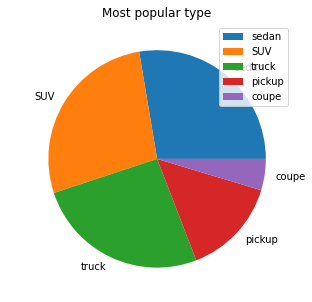

In [41]:
most_type = df_type.head(5)
most_type.plot(y='count_type', kind='pie', figsize=(5,5))
plt.title('Most popular type')
plt.ylabel(' ')
plt.show()

Dari diagram diatas bisa diliat untuk 2 iklan kendaraan yang paling banyak adalah kendaraan tipe sedan dan suv..

## Faktor Harga

### Sedan

In [42]:
# Melihat korelasi kendaraan tipe sedan
df_type_sedan = df_final[df_final['type'] == 'sedan'].reset_index(drop=True)
df_type_sedan.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,month_posted,day_posted,year_posted,age,range_per_year
0,5500,2013,hyundai sonata,4,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,3,2,7,2019,6,18333.333333
1,14900,2017,chrysler 200,3,4,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,1,4,2,2019,2,40451.500000
2,14990,2014,chrysler 300,3,6,gas,57954.0,automatic,sedan,black,True,2018-06-20,15,2,6,20,2018,4,14488.500000
3,12990,2015,toyota camry,3,4,gas,79212.0,automatic,sedan,white,False,2018-12-27,73,3,12,27,2018,3,26404.000000
4,8990,2012,honda accord,3,4,gas,111142.0,automatic,sedan,grey,False,2019-03-28,29,3,3,28,2019,7,15877.428571


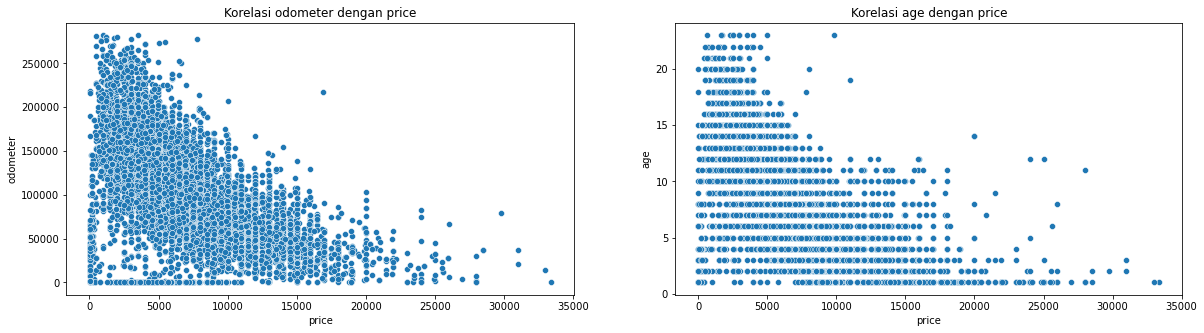

In [43]:
# Korelasi antara price dengan condition, odometer, dan age
sedan_group1 = df_type_sedan[['price','condition','odometer','age']]
plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(data=sedan_group1, x='price', y='odometer')
plt.title('Korelasi odometer dengan price')

plt.subplot(1, 2, 2)
sns.scatterplot(data=sedan_group1, x='price', y='age')
plt.title('Korelasi age dengan price')

plt.show()

In [44]:
sedan_group1.corr()['price']

price        1.000000
condition    0.293860
odometer    -0.555344
age         -0.614669
Name: price, dtype: float64

- Dari data tersebut kita memperoleh korelasi antara odometer dan age dengan price untuk kendaraan dengan tipe sedan berbanding terbalik atau negatif dan memiliki hubungan moderate karena nilainya diatas -0.5. Jadi dapat disimpulkan semakin tua usia mobilnya dan semakin banyak nilai odometernya berpengaruh di harga nya semakin murah.
- Sedangkan untuk condition memiliki korelasi yang berbanding lurus atau positif dengan price tetapi hubungannya lemah karena nilainya dibawah 0.3. Jadi kesimpulannya kondisi tidak terlalu berpengaruh terhadap harganya tetapi jika kondisinya bagus nilai harga nya juga bertambah.

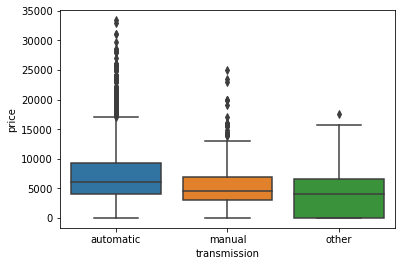

In [45]:
# Korelasi antara price dengan transmission dan paint_color
sedan_group2 = df_type_sedan[['price','transmission','paint_color']]
sns.boxplot(data=sedan_group2, x='transmission', y='price')
plt.show()

=> Distribusi 'price' terhadap kategori dari 'transmission' tidak terlalu menujukan persebaran yang signifikan. Sehingga 'transmission' tidak akan menjadi prediktor yang baik terhadap 'price'. Namun untuk datanya memang terlihat lebih banyak yang 'transmission' berjenis automatic.

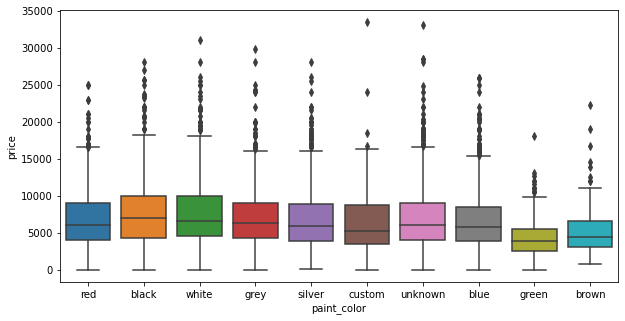

In [46]:
# Memisahkan nilai di kolom paint_color yang jumlah iklannya dibawah 50
list_color1 = list(sedan_group2['paint_color'].value_counts()[:-3].index)
sedan_group_color = sedan_group2[sedan_group2['paint_color'].isin(list_color1)].reset_index(drop=True)
plt.figure(figsize=(10,5))
sns.boxplot(data=sedan_group_color, x='paint_color', y='price')
plt.show()

=> Untuk kategori warna nya juga sama seperti kategori transmission, cukup bervariasi dan juga persebarannya tidak terlalu signifikan, tidak akan menjadi prediktor yang baik terhadap 'price'. 

In [47]:
# Melihat korelasi kendaraan tipe suv
df_type_suv = df_final[df_final['type'] == 'SUV'].reset_index(drop=True)
df_type_suv.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,month_posted,day_posted,year_posted,age,range_per_year
0,9400,2011,bmw x5,2,6,gas,145000.0,automatic,SUV,unknown,True,2018-06-23,19,5,6,23,2018,7,20714.285714
1,15990,2013,honda pilot,3,6,gas,109473.0,automatic,SUV,black,True,2019-01-07,68,0,1,7,2019,6,18245.500000
2,11500,2012,kia sorento,3,4,gas,104174.0,automatic,SUV,unknown,True,2018-07-16,19,0,7,16,2018,6,17362.333333
3,9200,2008,honda pilot,3,5,gas,147191.0,automatic,SUV,blue,True,2019-02-15,17,4,2,15,2019,11,13381.000000
4,12990,2009,gmc yukon,3,8,gas,132285.0,automatic,SUV,black,True,2019-01-31,24,3,1,31,2019,10,13228.500000


### SUV

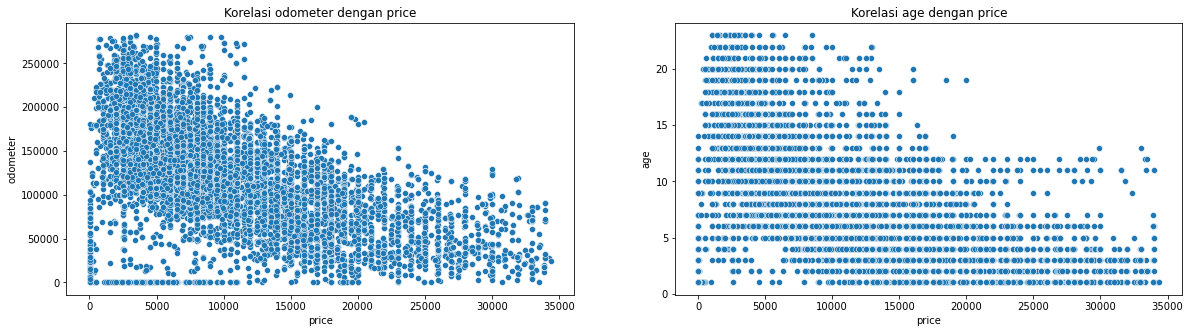

In [48]:
# Korelasi antara price dengan condition, odometer, dan age
suv_group1 = df_type_suv[['price','condition','odometer','age']]
plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(data=suv_group1, x='price', y='odometer')
plt.title('Korelasi odometer dengan price')

plt.subplot(1, 2, 2)
sns.scatterplot(data=suv_group1, x='price', y='age')
plt.title('Korelasi age dengan price')

plt.show()

In [49]:
suv_group1.corr()['price']

price        1.000000
condition    0.261904
odometer    -0.515197
age         -0.575310
Name: price, dtype: float64

- Dilihat dari data diatas korelasi antara odometer dan age dengan price untuk kendaraan tipe SUV, kurang lebih sama dengan kendaraan tipe sedan bedanya hanya pada nilai korelasi nya lebih rendah namun tetap diatas -0.5.
- Untuk condition juga kurang lebih sama, sama-sama memiliki nilai yang lemah. Yang berarti kondisi kendaraan tidak terlalu bepengaruh terhadap harga.

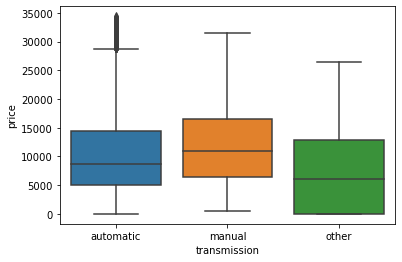

In [50]:
# Korelasi antara price dengan transmission dan paint_color
suv_group2 = df_type_suv[['price','transmission','paint_color']]
sns.boxplot(data=suv_group2, x='transmission', y='price')
plt.show()

=> Persebarannya kurang lebih sama dengan kendaraan tipe sedan, tidak menunjukkan perbedaan yang signifikan jadi tidak bisa menentukan pengaruh terhadap 'price'.

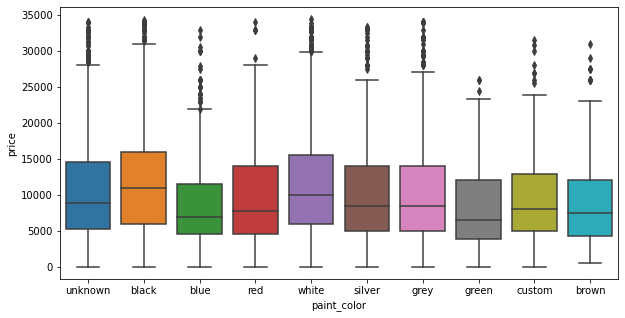

In [51]:
# Memisahkan nilai di kolom paint_color yang jumlah iklannya dibawah 50
list_color2 = list(suv_group2['paint_color'].value_counts()[:-3].index)
suv_group_color = suv_group2[suv_group2['paint_color'].isin(list_color2)].reset_index(drop=True)
plt.figure(figsize=(10,5))
sns.boxplot(data=suv_group_color, x='paint_color', y='price')
plt.show()

=> Untuk jenis warna kendaraan tipe SUV pun juga sama tidak ada perbedaan yang signifikan.

## Kesimpulan Umum

- Data yang saya gunakan diatas sebelumnya memiliki cukup banyak nilai yang hilang dan outliers
- Jadi ada beberapa data yang saya isi dengan rata-rata dan juga ada yang saya hapus 1 baris jika memiliki nilai yang hilang di satu kolom
- Untuk data yang mengandung Outliers juga tidak saya ikut kan didalam bagan
- kesimpulan yang dapat diambil yaitu faktor utama yang mempengaruhi harga dari kendaraan adalah umur dan jarak tempuh. Kondisi juga mempengaruhi namun tidak terlalu kuat, bisa saja kendaraan tersebut kondisi nya kurang bagus namun memiliki umur dan jarak tempuh yang rendah, jadi tetap memiliki harga yang agak tinggi.
- Untuk warna dan tipe transmisi nya cukup bervariasi, tidak mempengaruhi harga jualnya.